## Práctica Final de Minería de Datos

#### Presentación:  

Hola, me llamo Juan Schlemmer. Soy CEO a la cadena de **tiendas presenciales Gourmet**. Nos dedicamos al negocio de la alimentación y bebida de calidad.  

Tenemos presencia en **tiendas en Europa y Estados Unidos**.   

El negocio **no nos va mal**, pero me gustaría poder **aumentar la facturación de la empresa**. No tengo claro si **aumentando las ventas o reduciendo gastos ...**  

El otro día jugando al golf con un compañero que se dedica al negocio de las comunicaciones en comentó que había puesto en marcha un proyecto de ... Big Data o Minería de Datos o no sé qué del conocimiento ... no lo tengo claro ...   

Me dijo que le aconsejaron acciones concretas a partir de datos recogidos de su negocio y que está contento ... La cuestión es que os enviarán unos **datos extraídos de nuestro ERP** para que me hagáis esto de la minería. Por favor si tenéis dudas con los datos preguntar a nuestros técnicos. ¿Cuándo podré tener un primer informe? ¿Dentro de un mes? Perfecto ...


### Planteamiento Inicial:  

Una vez finalizada la primera reunión con Juan Schlemmer, se recibió la extracción de los ficheros de datos procedentes del **ERP**. Se comienza a trabajar sobre ellos, desde el enfoque de un **Proyecto de Minería**

![Texto alternativo](GourmetDB/ProyectoMineria.PNG "Título alternativo")

# 1. Definición de la Tarea  

Tras la reunión con el responsable, tenemos claro que aplicar **técnicas de Minería de Datos** para mejorar la creación de **conocimiento** dentro de la organización, y que ésta **incremente su beneficio**.  

Nuestra experiencia inicial nos permite plantear un primer escenario, en el que se incluyen 3 modelos predictivos. 

1. Modelo Predictivo basado en **Reglas de Asociación**. Estamos seguros de que, al tener registrados (todos o parte) de los productos adquiridos en los diferentes tickets de compra, se puede **realizar un conjunto de recomendaciones** para implusar la **venta cruzada**, organizar los **lineales** de las tiendas, etc.    

2. Modelo Predictivo basado en **Clasificación**. Para nosotros, la calidad es un elemento diferenciador y más si cabe, cuando se trata de un negocio enfocado a público **"selectivo"**. Por ello, se trabaja sobre la idea de poder **anticipar si un pedido incurrirá en "No Calidad"**. Para ello, se piensa en tratar el fichero de pedido y crear una etiqueta de Calidad. Sólo se consigue tener **calidad (1)**, si el pedido se entrega dentro de los primeros 15 días y con el 100% de las unidades solicitadas, sino el pedido es **no calidad (0)**.  

3. Modelo Predictivo basado en **Agregación**. Para este último, se trabaja sobre el fichero de **Resumen de Clientes**. Este fichero es el resultado de varios procesos de **enriquecimiento** y tratamiento de información vinculada a dichos clientes. De esta forma, se puede **clusterizar a la clientela** mediante el patrón que marque el algoritmo.

# 2. Origen de los Datos  

En esta etapa se importan la distintas librerías de Python con las que se desarrollará gran parte del trabajo de **Minería de Datos**. Las principales son; **pandas, numpy, matplotlib, MLXtend, sckitlearn**, ... Y se extraen los ficheros principales del **ERP de la organización**.

In [628]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
from matplotlib import pyplot as plt

## 2.1 Fichero Clientes

### 2.1.1. Incorporación del Fichero

In [629]:
col_Names=["IdCliente", "NombreCliente", "Sexo", "FechaNacimiento", "EstadoCivil", "Direccion", "Profesion", "NumeroHijos"
              ,"Region", "Nacionalidad","TotalCompras", "TotalPuntos"]
cliente = pd.read_csv("GourmetDB\\cliente.cvs",names=col_Names)

### 2.1.2 Análisis del Fichero

In [630]:
# Obtengo el registro de las primeras 5 filas del dataframe de cliente
cliente.head(3)

,IdCliente,NombreCliente,Sexo,FechaNacimiento,EstadoCivil,Direccion,Profesion,NumeroHijos,Region,Nacionalidad,TotalCompras,TotalPuntos
0,0000001R,Roca Sacristán Narciso,Hombre,19551220,Soltero/a,"Piazzale Suppercortemaggiore 4 , Milano","Economistas,Abogados & Admin.Empresas",0.0,Sur Europa,España,4,7
1,0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,C/ Niza 73 08032 Barcelona,Ingenieros & Especialistas,1.0,Sur Europa,España,16,13
2,0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,"corso Vittorio Emanuele, 102 Roma",Doctores & Profesionales de la Salud,2.0,Sur Europa,España,14,10


In [631]:
cliente.tail(3)

,IdCliente,NombreCliente,Sexo,FechaNacimiento,EstadoCivil,Direccion,Profesion,NumeroHijos,Region,Nacionalidad,TotalCompras,TotalPuntos
4066,3997753S,Santer Thomas,Hombre,19130523,Soltero/a,"29 Kensington Park Road ,London W2",Ama de Casa,0.0,Norte Europa,Reino Unido,9,7
4067,3932218M,Mcguire Esther,Mujer,19460825,Divorciado/a,"20 Monmouth Street ,London EC3",Gerentes & Directivos,0.0,Norte Europa,Reino Unido,8,9
4068,3932219B,Burguera Liria Valentín,Hombre,19391012,Divorciado/a,"Via S.Lavagnini 20 ,Florencia","Economistas,Abogados & Admin.Empresas",3.0,Sur Europa,España,5,10


In [632]:
cliente.describe(include='all')

,IdCliente,NombreCliente,Sexo,FechaNacimiento,EstadoCivil,Direccion,Profesion,NumeroHijos,Region,Nacionalidad,TotalCompras,TotalPuntos
count,4069,4069,4069,4.069000e+03,3264,4069,4069,3264.000000,4069,4069,4069.000000,4069.000000
unique,4069,3288,3,NaN,4,2544,10,NaN,3,3,NaN,NaN
top,0131111B,Payne Henry,Hombre,NaN,Casado/a,"15 Bury St, St James'S ,London NW1","Economistas,Abogados & Admin.Empresas",NaN,Norte Europa,Reino Unido,NaN,NaN
freq,1,6,2076,NaN,1318,7,707,NaN,1821,1821,NaN,NaN
mean,NaN,NaN,NaN,1.951699e+07,NaN,NaN,NaN,0.968444,NaN,NaN,8.728680,11.535267
std,NaN,NaN,NaN,1.780856e+05,NaN,NaN,NaN,1.252120,NaN,NaN,6.024541,9.474000
min,NaN,NaN,NaN,1.910020e+07,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,5.000000
25%,NaN,NaN,NaN,1.939022e+07,NaN,NaN,NaN,0.000000,NaN,NaN,5.000000,7.000000
50%,NaN,NaN,NaN,1.951111e+07,NaN,NaN,NaN,0.000000,NaN,NaN,8.000000,9.000000
75%,NaN,NaN,NaN,1.967081e+07,NaN,NaN,NaN,2.000000,NaN,NaN,12.000000,12.000000


In [633]:
cliente['Sexo'].unique()

array(['Hombre ', 'Mujer', 'Empresa'], dtype=object)

In [634]:
cliente['Sexo'].value_counts()

Hombre     2076
Mujer      1188
Empresa     805
Name: Sexo, dtype: int64

In [635]:
cliente['EstadoCivil'].unique()

array(['Soltero/a', 'Casado/a ', 'Divorciado/a ', nan, 'Viudo/a'], dtype=object)

In [636]:
cliente['EstadoCivil'].value_counts()

Casado/a         1318
Soltero/a        1219
Divorciado/a      651
Viudo/a            76
Name: EstadoCivil, dtype: int64

In [637]:
cliente['Profesion'].unique()

array(['Economistas,Abogados & Admin.Empresas ',
       'Ingenieros & Especialistas',
       'Doctores & Profesionales de la Salud', 'Gerentes & Directivos ',
       'Catering', 'Architectos,Decoradores & Humanistas', 'Servicios ',
       'Ama de Casa ', 'Alimentación', 'Food'], dtype=object)

In [638]:
cliente['Profesion'].value_counts()

Economistas,Abogados & Admin.Empresas     707
Gerentes & Directivos                     703
Doctores & Profesionales de la Salud      663
Ingenieros & Especialistas                507
Architectos,Decoradores & Humanistas      485
Catering                                  339
Alimentación                              271
Ama de Casa                               199
Servicios                                 193
Food                                        2
Name: Profesion, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002756F74D240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002757369A8D0>]], dtype=object)

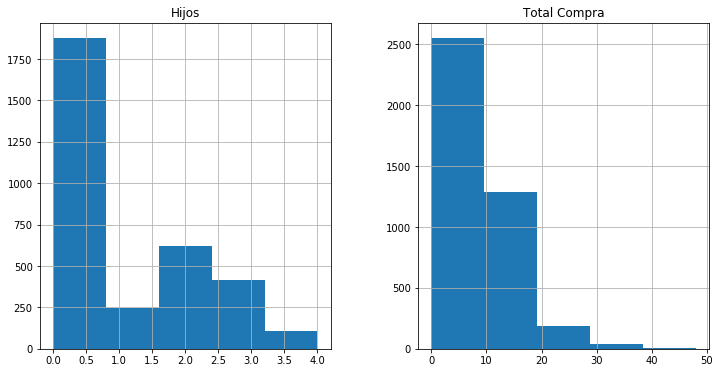

In [639]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Hijos":cliente["NumeroHijos"], "Total Compra":cliente["TotalCompras"]})
prices.hist(bins=5)

### 2.1.3. Conclusión  

La primera aproximación muestra **datos algo "sospechosos"** como sólo 3 Nacionalidades y Regiones. Así como 10 profesiones.  

![Texto alternativo](GourmetDB/Cliente.PNG "Título alternativo")

Con respecto al formulario de trabajo del ERP, las conclusiones no son muy positivas. Habrá que trabajar duro sobre él. No se pueden permitir aspectos como:  
1. Fecha Nacimiento sin formato
2. Dirección agrupada y sin validar
3. Ausencia del DNI o similar
4. Nombre del cliente agrupado

## 2.2. Fichero Cabecera Ticket

### 2.2.1. Incorporación del Fichero

In [640]:
col_Names=["CodVenta", "Tienda", "Fecha", "Hora", "FormaPago", "IdCliente", "Total", "UnidadesTicket", "PuntosTicket"]
cabeceraticket = pd.read_csv("GourmetDB\\cabeceraticket.cvs",names=col_Names)

### 2.2.2. Análisis del Fichero

In [641]:
# Obtengo el registro de las primeras 5 filas del dataframe de cabecera de ticket
cabeceraticket.head(3)

,CodVenta,Tienda,Fecha,Hora,FormaPago,IdCliente,Total,UnidadesTicket,PuntosTicket
0,P20000000,París II,20000918,16,Tarjeta de Crédito,NaN,33.1875,3,0
1,P20000001,París II,20000908,17,Efectivo,NaN,61.9400,2,1
2,P20065536,París II,20000915,13,Tarjeta de Crédito,NaN,26.9175,2,0


In [642]:
cabeceraticket.tail(3)

,CodVenta,Tienda,Fecha,Hora,FormaPago,IdCliente,Total,UnidadesTicket,PuntosTicket
74324,BA0524404,Barcelona,20001102,21,Tarjeta de Crédito,NaN,11.45,1,0
74325,BA0524405,Barcelona,20001223,18,Tarjeta de Crédito,NaN,11.25,1,0
74326,BA0589940,Barcelona,20001231,19,Tarjeta de Crédito,NaN,5.50,1,0


In [643]:
cabeceraticket.describe(include='all')

,CodVenta,Tienda,Fecha,Hora,FormaPago,IdCliente,Total,UnidadesTicket,PuntosTicket
count,74327,74327,7.432700e+04,74327.000000,74327,35517,74327.000000,74327.000000,74327.000000
unique,74327,15,NaN,NaN,6,3923,NaN,NaN,NaN
top,BA0589842,Londres I,NaN,NaN,Tarjeta de Crédito,3145777T,NaN,NaN,NaN
freq,1,10652,NaN,NaN,24779,48,NaN,NaN,NaN
mean,NaN,NaN,2.000108e+07,17.058646,NaN,NaN,45.227281,3.119364,0.342325
std,NaN,NaN,1.145073e+02,4.143137,NaN,NaN,60.247611,3.159675,0.696765
min,NaN,NaN,2.000090e+07,9.000000,NaN,NaN,2.000000,1.000000,0.000000
25%,NaN,NaN,2.000100e+07,13.000000,NaN,NaN,13.795000,1.000000,0.000000
50%,NaN,NaN,2.000110e+07,18.000000,NaN,NaN,29.950000,2.000000,0.000000
75%,NaN,NaN,2.000121e+07,21.000000,NaN,NaN,54.000000,4.000000,1.000000


In [644]:
cabeceraticket['Tienda'].unique()

array(['París II', 'Londres II', 'Milán ', 'Liverpool ', 'Madrid',
       'Barcelona ', 'Manhattan I ', 'Londres I ', 'Roma', 'Florencia ',
       'Munich', 'París I ', 'Manhattan II', 'Miami Beach ',
       'Fort Lauderdale '], dtype=object)

In [645]:
cabeceraticket['Tienda'].value_counts()

Londres I           10652
Manhattan I          8984
Londres II           6995
Milán                6701
Munich               5882
París I              5586
Barcelona            5523
Roma                 5166
Madrid               3773
Miami Beach          3717
Liverpool            3666
París II             2162
Florencia            2034
Manhattan II         1986
Fort Lauderdale      1500
Name: Tienda, dtype: int64

In [646]:
cabeceraticket['Hora'].unique()

array([16, 17, 13, 14, 10, 11, 21,  9, 12, 18, 20, 15, 19, 22], dtype=int64)

In [647]:
cabeceraticket['Hora'].value_counts()

21    15691
20     9476
22     7674
12     4362
10     4334
11     4207
13     4180
14     4088
15     4038
16     3848
17     3614
18     3455
19     3252
9      2108
Name: Hora, dtype: int64

In [648]:
cabeceraticket['Date'] = pd.to_datetime(cabeceraticket['Fecha'].astype(str), format='%Y%m%d')

In [649]:
cabeceraticket['DiaSemana'] = cabeceraticket['Date'].dt.weekday

In [650]:
cabeceraticket.head(5)

,CodVenta,Tienda,Fecha,Hora,FormaPago,IdCliente,Total,UnidadesTicket,PuntosTicket,Date,DiaSemana
0,P20000000,París II,20000918,16,Tarjeta de Crédito,NaN,33.1875,3,0,2000-09-18,0
1,P20000001,París II,20000908,17,Efectivo,NaN,61.9400,2,1,2000-09-08,4
2,P20065536,París II,20000915,13,Tarjeta de Crédito,NaN,26.9175,2,0,2000-09-15,4
3,P20065537,París II,20000915,14,Tarjeta de Crédito,NaN,22.9500,3,0,2000-09-15,4
4,P20000002,París II,20000902,10,Cheque,NaN,106.8200,6,1,2000-09-02,5


In [651]:
cabeceraticket['DiaSemana'].value_counts()

5    23656
4    15423
3    10387
6     9454
2     6570
1     4466
0     4371
Name: DiaSemana, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027576946F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000275730611D0>]], dtype=object)

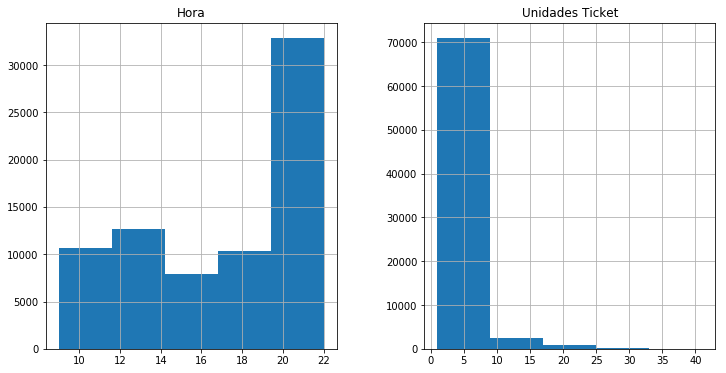

In [652]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Hora":cabeceraticket["Hora"], "Unidades Ticket":cabeceraticket["UnidadesTicket"]})
prices.hist(bins=5)

### 2.2.3 Conclusión

Se observan 15 tiendas físicas con venta, lo que choca más si cabe con las 3 nacionalidades. También se identifica el horario, de 9 a 22. Los 3.923 clientes y las 6 modalidades de pago.  

![Texto alternativo](GourmetDB/SinCliente.PNG "Título alternativo")

**IMPORTANTE:** En un posterior análisis visual, se observó que existían **38.810 tickets sin cliente** asignado. Esto es muy grave si quieres obtener conocmiento de los datos. Ya que **estás perdiendo el 50%** de ellos.  

También es importante resaltar que el mayor % de ventas se realiza a **última hora de la tarde / noche**. Puede ser porque el consumo sea en la cena. El día de la semana que más se compra es **el sábado**, seguido de viernes y jueves.

## 2.3. Fichero Producto

### 2.3.1. Incorporación del Fichero

In [653]:
col_Names=[ "Descripcion", "Pais", "Coste", "Precio", "TipoUnidad", "Subfamilia", "Marca" ,"IdProveedor"]
producto = pd.read_csv("GourmetDB\\producto.cvs", names=col_Names)

producto.reset_index(inplace=True)

In [654]:
producto.rename(
  columns={
    'index' : 'IdProducto'
  },
  inplace=True
)

### 2.3.2. Análisis del Fichero

In [655]:
# Obtengo el registro de las primeras 5 filas del dataframe de producto
producto.head(3)

,IdProducto,Descripcion,Pais,Coste,Precio,TipoUnidad,Subfamilia,Marca,IdProveedor
0,001CH,Chesire,Reino Unido,3.30,4.69,Porción (250 g),Vaca Curado,Smith Farmer,101
1,002CO,Cotswold,Reino Unido,3.47,4.98,Porción (250 g),Vaca Curado,Old Hill,101
2,003CL,Crumbly Lancanshire,Reino Unido,3.93,5.59,Porción (250 g),Vaca Semicurado,The Farmhouse,101


In [656]:
producto.tail(3)

,IdProducto,Descripcion,Pais,Coste,Precio,TipoUnidad,Subfamilia,Marca,IdProveedor
336,338CO,Cognac,Francia,101.10,169.95,Botella,D.O. Cognac,L'Evèque,311
337,339CO,Cognac,Francia,59.22,114.15,Botella,D.O. Cognac,L'Evèque,311
338,340CO,Cognac,Francia,30.39,60.75,Botella,D.O. Cognac,L'Evèque,311


In [657]:
producto.describe(include='all')

,IdProducto,Descripcion,Pais,Coste,Precio,TipoUnidad,Subfamilia,Marca,IdProveedor
count,339,339,339,339.000000,339.000000,339,339,339,339.000000
unique,339,248,15,NaN,NaN,5,74,184,NaN
top,303SE,Tinto Reserva 95,España,NaN,NaN,Botella,D.O. Rioja-Tinto,West Vineyards,NaN
freq,1,17,113,NaN,NaN,205,40,13,NaN
mean,NaN,NaN,NaN,11.095900,18.990914,NaN,NaN,NaN,240.300885
std,NaN,NaN,NaN,31.783422,51.779461,NaN,NaN,NaN,94.192603
min,NaN,NaN,NaN,1.400000,2.000000,NaN,NaN,NaN,101.000000
25%,NaN,NaN,NaN,4.180000,6.305000,NaN,NaN,NaN,110.000000
50%,NaN,NaN,NaN,6.150000,9.980000,NaN,NaN,NaN,304.000000
75%,NaN,NaN,NaN,11.100000,19.950000,NaN,NaN,NaN,315.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275733F5C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027574230898>]], dtype=object)

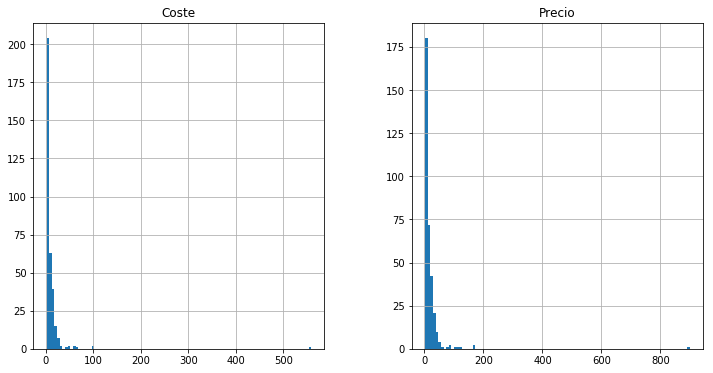

In [658]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Coste":producto["Coste"], "Precio":producto["Precio"]})
prices.hist(bins=100)

### 2.3.3. Conclusión  

Existen 339 artículos, de 15 países y 184 marcas comerciales. 

## 2.4. Fichero Lineas de Ticket

### 2.4.1. Incorporación del Fichero

In [659]:
col_Names=["CodLinea", "CodVenta", "Tienda", "IdProducto", "Cantidad", "Precio", "Promocion", "IdCabecera"]
lineasticket = pd.read_csv("GourmetDB\\lineasticket.cvs",names=col_Names)

### 2.4.2. Análisis del Fichero

In [660]:
# Obtengo el registro de las primeras 5 filas del dataframe de lineas de ticket
lineasticket.head(3)

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera
0,1,RO0196608,Roma,123CB,1,3.990,NaN,13641
1,1,RO0196609,Roma,267BP,1,8.800,NaN,13642
2,2,RO0065539,Roma,079MA,1,4.975,NaN,13638


In [661]:
lineasticket.tail(3)

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera
174668,1,BA0524404,Barcelona,240TR,1,11.45,NaN,87851
174669,1,BA0524405,Barcelona,189ME,1,11.25,NaN,87852
174670,1,BA0589940,Barcelona,082QC,1,5.50,NaN,87853


In [662]:
lineasticket.describe(include='all')

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera
count,174671.000000,174671,174671,174671,174671.000000,174671.000000,1749,174671.000000
unique,NaN,74327,15,338,NaN,NaN,5,NaN
top,NaN,M15505039,Londres I,022CA,NaN,NaN,Merlot Introduction,NaN
freq,NaN,15,29803,6409,NaN,NaN,876,NaN
mean,2.135208,NaN,NaN,NaN,1.328681,14.454361,NaN,50679.358938
std,1.412435,NaN,NaN,NaN,0.711723,17.112251,NaN,21398.903140
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,13527.000000
25%,1.000000,NaN,NaN,NaN,1.000000,5.725000,NaN,32332.000000
50%,2.000000,NaN,NaN,NaN,1.000000,9.587500,NaN,50578.000000
75%,3.000000,NaN,NaN,NaN,1.000000,19.380000,NaN,69085.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027574BCB748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027574BC4898>]], dtype=object)

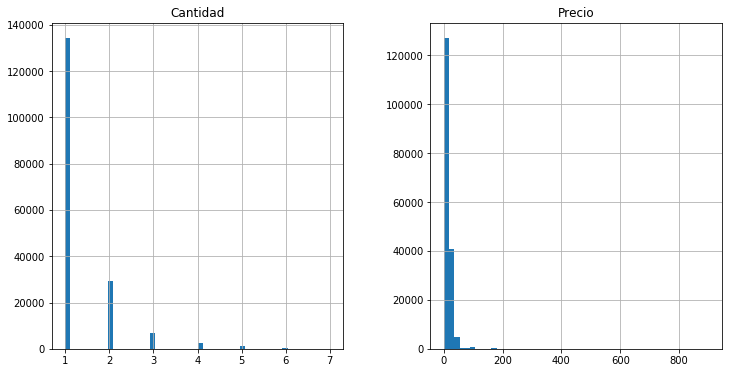

In [663]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Cantidad":lineasticket["Cantidad"], "Precio":lineasticket["Precio"]})
prices.hist(bins=50)

### 2.4.3. Conclusión  

Este fichero es el principal sobre el que se desarrolla el **Modelo Predictivo de Reglas de Asociación**. Tiene como finalidad última poder generar recomendaciones a los clientes, en base al **análisis de la "cesta de la compra"** del conjunto de los clientes.  

En una **segunda estapa**, se puede afinar al modelo **segmentando por Tienda**, de cara a proveer un **servicio** aún más **personalizado** a los clientes habituales del establecimiento. Ya que los gustos pueden no ser los mismos entre el público de una u otra tienda.  

![Texto alternativo](GourmetDB/UnidadTicket.PNG "Título alternativo")

Con respecto a la información obtenida del análisis estadístico, se puede comentar que hay un **total de 174.671 líneas de tickets**, la tienda con mayor número de líneas es **Londres I** (vemos que sucede lo mismo en pedidos). Destaca que hay **artículos que se "regalan"** ya que el precio que aparece es 0. Se ve más adelante que son tres artículos de poco valor y que se incluyen como "detalle" en ciertas ocasiones.



## 2.5. Fichero Proveedor

### 2.5.1. Incorporación del Fichero

In [664]:
col_Names=["IdProveedor", "NombreProveedor", "PersonaContacto", "Direccion", "Telefono", "PediodoPago", "PagoPendiente", "TipoProveedor", "Alcance"]
proveedor = pd.read_csv("GourmetDB\\proveedor.cvs",names=col_Names)

### 2.5.2. Análisis del Fichero

In [665]:
# Obtengo el registro de las primeras 5 filas del dataframe de proveedor
proveedor.head(3)

,IdProveedor,NombreProveedor,PersonaContacto,Direccion,Telefono,PediodoPago,PagoPendiente,TipoProveedor,Alcance
0,101,The Farmhouse Company,Richard Addams,"122 Brackenbury Rd.,London SW3",76589900,60,NaN,NaN,Global
1,102,Cooperative de Produits Laitiers,Jean François Duval,"34 Rue de Raspail , Brussels, Belgium",90090011,60,NaN,NaN,Global
2,103,Compagnie Laitier,Florence Deveroix,"96 Rue Vauvilliers , 75003 Paris, France",79034678,60,NaN,NaN,Global


In [666]:
proveedor.tail(3)

,IdProveedor,NombreProveedor,PersonaContacto,Direccion,Telefono,PediodoPago,PagoPendiente,TipoProveedor,Alcance
45,327,Francis Jr. Cellars,Greg Foster,"12 American Dr, St Pauls NSW 2111 Australia",5568990,30,NaN,NaN,Global
46,328,Atlas Vineyard,Donald Foley,"34 Coupar Av , Sydney NSW 1001Australia",3346678,30,NaN,NaN,Global
47,329,Compañía del Valle Montemar,Gregorio Sullivan,"Salud, 21 Santiago 45901 Chile",6657888,15,NaN,NaN,Global


In [667]:
proveedor.describe(include='all')

,IdProveedor,NombreProveedor,PersonaContacto,Direccion,Telefono,PediodoPago,PagoPendiente,TipoProveedor,Alcance
count,48.000000,48,48,48,4.800000e+01,48.000000,0.0,0.0,48
unique,NaN,48,48,48,NaN,NaN,NaN,NaN,3
top,NaN,"Cia. De Licores, S.A.",Maria Gutierrez,MariaGränd 357 Slussen Stockholm Sweden,NaN,NaN,NaN,NaN,Global
freq,NaN,1,1,1,NaN,NaN,NaN,NaN,46
mean,240.937500,NaN,NaN,NaN,2.798296e+08,56.562500,NaN,NaN,NaN
std,95.914724,NaN,NaN,NaN,4.024953e+08,26.116683,NaN,NaN,NaN
min,101.000000,NaN,NaN,NaN,3.346678e+06,15.000000,NaN,NaN,NaN
25%,112.750000,NaN,NaN,NaN,7.868732e+06,30.000000,NaN,NaN,NaN
50%,305.500000,NaN,NaN,NaN,5.685290e+07,60.000000,NaN,NaN,NaN
75%,317.250000,NaN,NaN,NaN,9.123497e+08,90.000000,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027573C50860>]], dtype=object)

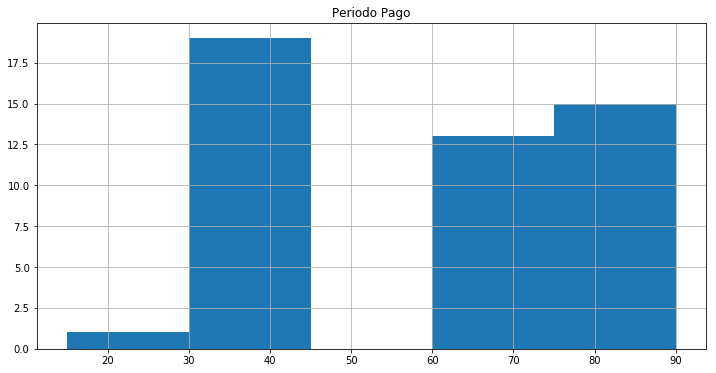

In [668]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Periodo Pago":proveedor["PediodoPago"]})
prices.hist(bins=5)

### 2.5.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar.  

Únicamente mencionar que existen 48 proveedores, casi todos (46) con servicio Global y con Periodo de Pago muy diverso, de entre 15 y 90 días.

## 2.6. Fichero Promoción

### 2.6.1. Incorporación del Fichero

In [669]:
col_Names=["NombrePromocion", "TipoPromocion", "Coste", "FechaInicio", "FechaFin", "IdProducto", "Familia", "Seccion", "Tienda","Region","Pais"]
promocion = pd.read_csv("GourmetDB\\promocion.cvs",names=col_Names)

### 2.6.2. Análisis del Fichero

In [670]:
# Obtengo el registro de las primeras 5 filas del dataframe de promocion
promocion.head(3)

,NombrePromocion,TipoPromocion,Coste,FechaInicio,FechaFin,IdProducto,Familia,Seccion,Tienda,Region,Pais
0,Semillon 5%,Descuento 5%,NaN,20000901,20000930,295GS,NaN,NaN,NaN,NaN,NaN
1,Merlot Introduction,3x2,NaN,20001001,20001031,308ME,NaN,NaN,NaN,NaN,NaN
2,Mahon-Chardonnay,Cruzada,NaN,20001001,20001031,077MA,NaN,NaN,Manhattan I,NaN,NaN


In [671]:
promocion.tail(3)

,NombrePromocion,TipoPromocion,Coste,FechaInicio,FechaFin,IdProducto,Familia,Seccion,Tienda,Region,Pais
2,Mahon-Chardonnay,Cruzada,NaN,20001001,20001031,077MA,NaN,NaN,Manhattan I,NaN,NaN
3,Carquiñolis-GranReserva,Cruzada,NaN,20001101,20001130,108CA,NaN,NaN,Barcelona,NaN,NaN
4,Chocolate-Champagne,Cruzada,NaN,20001101,20001130,123CB,NaN,NaN,Londres I,NaN,NaN


In [672]:
promocion.describe(include='all')

,NombrePromocion,TipoPromocion,Coste,FechaInicio,FechaFin,IdProducto,Familia,Seccion,Tienda,Region,Pais
count,5,5,0.0,5.000000e+00,5.000000e+00,5,0.0,0.0,3,0.0,0.0
unique,5,3,NaN,NaN,NaN,5,NaN,NaN,3,NaN,NaN
top,Semillon 5%,Cruzada,NaN,NaN,NaN,295GS,NaN,NaN,Barcelona,NaN,NaN
freq,1,3,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,2.000102e+07,2.000105e+07,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.366600e+01,8.354819e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.000090e+07,2.000093e+07,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000100e+07,2.000103e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000100e+07,2.000103e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000110e+07,2.000113e+07,NaN,NaN,NaN,NaN,NaN,NaN


### 2.6.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar. Llama mucho la atención que únicamente existan 5 promociones para 3 tiendas.

## 2.7. Fichero Pedido

### 2.7.1. Incorporación del Fichero

In [673]:
col_Names=["IdPedido", "Tienda", "IdProducto", "PrecioCompra", "CantidadPedido", "FechaPedido", "CantidadEntrega", "FechaEntrega"]
pedido = pd.read_csv("GourmetDB\\pedido.cvs",names=col_Names)

### 2.7.2. Análisis del Fichero

In [674]:
# Obtengo el registro de las primeras 5 filas del dataframe de pedido
pedido.head(3)

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega
0,82207,Florencia,137TR,16.00,12,20000801,12,20000821
1,70595,Milán,219SY,18.28,12,20000801,12,20000821
2,93196,Miami Beach,335GB,9.31,12,20000801,12,20000821


In [675]:
pedido.tail(3)

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega
8879,71296,Barcelona,136TR,11.56,24,20001101,24,20001121
8880,81047,Londres I,288BR,27.06,48,20001101,48,20001121
8881,61004,Manhattan II,061PR,3.79,10,20001101,10,20001115


In [676]:
#Incluimos nuevas columnas que incrementen la información del Pedido
pedido["ImportePedido"] = pedido["PrecioCompra"] * pedido["CantidadPedido"]
pedido["ImporteEntrega"] = pedido["PrecioCompra"] * pedido["CantidadEntrega"]
pedido["NoServido"] = pedido["CantidadPedido"] - pedido["CantidadEntrega"]
pedido["TiempoEntrega"] = pedido["FechaEntrega"] - pedido["FechaPedido"]

In [677]:
pedido.describe(include='all')

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega,ImportePedido,ImporteEntrega,NoServido,TiempoEntrega
count,8882.000000,8882,8882,8882.000000,8882.000000,8.882000e+03,8882.000000,8.882000e+03,8882.000000,8882.000000,8882.000000,8882.000000
unique,NaN,15,338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Londres I,022CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,708,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50512.325377,NaN,NaN,8.198780,26.127224,2.000095e+07,26.083202,1.999545e+07,222.305985,221.997610,0.044022,-5498.812204
std,28741.085580,NaN,NaN,11.048658,57.964050,1.340059e+02,57.974603,7.406803e+04,655.199343,655.239902,0.632579,74067.636219
min,4.000000,NaN,NaN,1.400000,10.000000,2.000080e+07,0.000000,1.900090e+07,16.800000,0.000000,0.000000,-999897.000000
25%,25867.250000,NaN,NaN,3.930000,10.000000,2.000080e+07,10.000000,2.000082e+07,47.640000,47.400000,0.000000,14.000000
50%,50867.500000,NaN,NaN,5.250000,12.000000,2.000100e+07,12.000000,2.000093e+07,78.300000,78.000000,0.000000,20.000000
75%,75394.500000,NaN,NaN,8.480000,24.000000,2.000110e+07,24.000000,2.000112e+07,191.160000,190.500000,0.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027572D7BF60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027572AECC88>]], dtype=object)

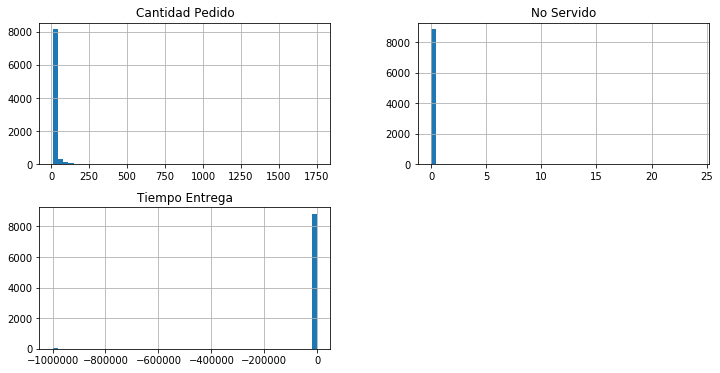

In [678]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({"Cantidad Pedido":pedido["CantidadPedido"],"No Servido":pedido["NoServido"], "Tiempo Entrega":pedido["TiempoEntrega"]})
prices.hist(bins=50)

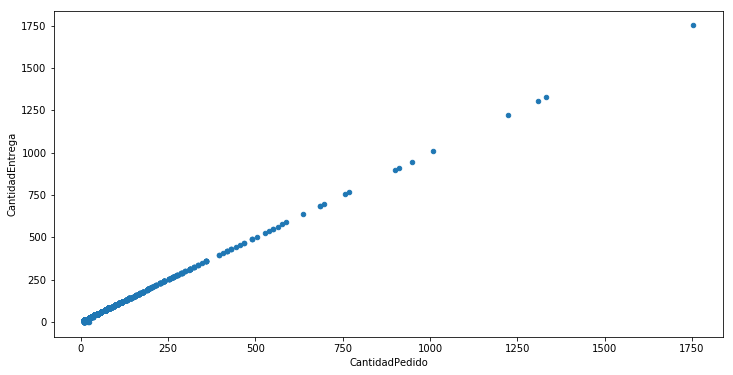

In [679]:
comportamiento = pd.DataFrame({"CantidadPedido": (pedido["CantidadPedido"]), "CantidadEntrega":(pedido["CantidadEntrega"])})
comportamiento.plot(x = "CantidadPedido", y = "CantidadEntrega", kind = "scatter")

### 2.7.3. Conclusión  

Este fichero es la base de trabajo del Modelo Predictivo basado en Clasificación, por ello se han creado nuevas características como:  

1. Importe Pedido  
2. Importe Entrega
3. Cantidad no servida
4. Tiempo de entrega  

Si bien las dos primeras nos servirían para analizar la desviación económica que supone no realizar una buena disensación de los pedidos a los clientes. La dos siguientes nos permiten crear la etiqueta que define si **el servicio ha sido o no de calidad**.  

Por otro lado, vemos que de los pedidos participan las 15 tiendas, que **la más frecuente es Londres I**. También se observa que el catálogo completo se sirve desde el Departamento de Pedidos, si bien el 022CA es el más solicitado.  
Con las nuevas medidas, se ve que aunque el pedido mínimo son 10 unidades, hay ocasiones en las que no se entrega nada. El tiempo **medio de reparto** es de **20 días**, lo que puede ser **"inapropiado".** Siendo la demora másxima de casi un mes, lo que a todas luces plantea un "problema".

## 2.8. Fichero Tienda

### 2.8.1. Incorporación del Fichero

In [680]:
col_Names=["Nombre", "Direccion", "Superficie", "Formato", "Pais", "Tipo"]
tienda = pd.read_csv('GourmetDB\\tienda.cvs',names=col_Names)

### 2.8.2. Análisis del Fichero

In [681]:
# Obtengo el registro de las primeras 5 filas del dataframe de tienda
tienda.head(3)

,Nombre,Direccion,Superficie,Formato,Pais,Tipo
0,Barcelona,"Castellets, 119",223.0,Centro comercial,España,XRTX
1,Florencia,"Venize, 56",275.0,Tienda de barrio,Italia,XRTS
2,Fort Lauderdale,"23, Vyn Ness Street",135.0,Centro comercial,Estados Unidos,BRTX


In [682]:
tienda.tail(3)

,Nombre,Direccion,Superficie,Formato,Pais,Tipo
12,París I,"67, Rue Vermont",75.0,Galería,Francia,XRXX
13,París II,"89, Rue Saint Michel",175.0,Tienda de barrio,Francia,BXTX
14,Roma,"Pietro III, 18",215.0,Galería,Italia,XRTX


In [683]:
tienda.describe(include='all')

,Nombre,Direccion,Superficie,Formato,Pais,Tipo
count,15,15,15.000000,15,15,15
unique,15,15,NaN,3,6,8
top,Miami Beach,"Paseo de los Pajaritos, 158",NaN,Tienda de barrio,Estados Unidos,BXTX
freq,1,1,NaN,6,4,3
mean,NaN,NaN,163.800000,NaN,NaN,NaN
std,NaN,NaN,62.631804,NaN,NaN,NaN
min,NaN,NaN,75.000000,NaN,NaN,NaN
25%,NaN,NaN,107.000000,NaN,NaN,NaN
50%,NaN,NaN,170.000000,NaN,NaN,NaN
75%,NaN,NaN,207.500000,NaN,NaN,NaN


### 2.8.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información. Es cierto que aporta información interesante que enriquecería otros ficheros resumen, sin embargo en esta primera etapa su uso que fuera del alcance.  

Existen 15 tiendas, que concuerda con el valor obtenido en cabecera de ticket.  
Existen 3 modalidades de tiendas, siendo la de proximidad la más frecuente, con 6 tiendas.  
Hay presencia en un total de 6 países
Existen 8 tipos diferentes, siendo el más habitual el de BXTX

## 2.9. Fichero Familia

### 2.9.1. Incorporación del Fichero

In [684]:
col_Names=["Familia", "Nombre", "Descripcion", "Seccion"]
familia = pd.read_csv('GourmetDB\\familia.cvs',names=col_Names)

### 2.9.2. Análisis del Fichero

In [685]:
# Obtengo el registro de las primeras 5 filas del dataframe de familia
familia.head(5)

,Familia,Nombre,Descripcion,Seccion
0,D.O. Rioja,NaN,Vinos,NaN
1,D.O. Penedés,NaN,Vinos,NaN
2,D.O. Ribera del Duero,NaN,Vinos,NaN
3,D.O. Somontano,NaN,Vinos,NaN
4,D.O. Priorato,NaN,Vinos,NaN


### 2.9.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar.

## 2.10. Fichero Subfamilia

### 2.10.1. Incorporación del Fichero

In [686]:
col_Names=["Subfamilia", "Nombre", "Descripcion", "Familia"]
subfamilia = pd.read_csv('GourmetDB\\subfamilia.cvs',names=col_Names)

### 2.10.2. Análisis del Fichero

In [687]:
# Obtengo el registro de las primeras 5 filas del dataframe de subfamilia
subfamilia.head(5)

,Subfamilia,Nombre,Descripcion,Familia
0,D.O. Rioja-Tinto,NaN,D.O. Rioja,NaN
1,D.O. Rioja-Blanco,NaN,D.O. Rioja,NaN
2,D.O. Rioja-Rosado,NaN,D.O. Rioja,NaN
3,D.O. Penedés-Tinto,NaN,D.O. Penedés,NaN
4,D.O. Penedés-Blanco,NaN,D.O. Penedés,NaN


### 2.10.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar.

## 2.11. Fichero Sección

### 2.11.1. Incorporación del Fichero

In [688]:
col_Names=["Seccion", "Descripcion"]
seccion = pd.read_csv('GourmetDB\\seccion.cvs',names=col_Names)

### 2.11.2. Análisis del Fichero

In [689]:
# Obtengo el registro de las primeras 5 filas del dataframe de seccion
seccion.head(5)

,Seccion,Descripcion
0,Vinos,NaN
1,Espumosos,NaN
2,Licores,NaN
3,Quesos,NaN
4,Postres,NaN


### 2.11.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar.

## 2.12. Fichero País

### 2.12.1. Incorporación del Fichero

In [690]:
col_Names=["Pais", "Extension", "Poblacion", "Region"]
pais = pd.read_csv('GourmetDB\\pais.cvs',names=col_Names)

In [691]:
pais["Densidad"] = pais["Poblacion"] / pais["Extension"]

### 2.12.2. Análisis del Fichero

In [692]:
# Obtengo el registro de las primeras 5 filas del dataframe de pais
pais.head(5)

,Pais,Extension,Poblacion,Region,Densidad
0,Italia,301230.0,58384321.0,Sur Europa,193.819742
1,Estados Unidos,9372610.0,266504935.0,Norteamérica,28.434442
2,España,504750.0,39510740.0,Sur Europa,78.277841
3,Francia,547030.0,58376462.0,Norte Europa,106.715284
4,Alemania,356910.0,81549019.0,Norte Europa,228.486226


### 2.12.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar. Aunque se ha generado la nueva columna de densidad de población, y se ve que contiene datos importantes para análisis de couta de mercado, posibilidad de marcar prioridades de expansión, etc. En esta primera fase no se utilizará.

![Texto alternativo](GourmetDB/Compras10K.PNG "Título alternativo")

## 2.13. Fichero Región Geográfica

### 2.13.1. Incorporación del Fichero

In [693]:
col_Names=["Region", "Continente"]
regiongeografica = pd.read_csv('GourmetDB\\regiongeografica.cvs',names=col_Names)

### 2.13.2. Análisis del Fichero

In [694]:
# Obtengo el registro de las primeras 5 filas del dataframe de region geografica
regiongeografica.head(5)

,Region,Continente
0,Norteamérica,América
1,Latinoamérica,América
2,Norte Europa,Europa
3,Sur Europa,Europa
4,Oceanía,Oceanía


### 2.13.3. Conclusión  

Este fichero no va a ser utilizado en el proceso inicial de extracción de información, ya que se ha descartado la agrupación que puede generar.

# 3. Preparación de los Datos

### 3.1. JOIN de Pedido & Producto

####   IMPORTANTE
En este caso, voy a usar el Pedido junto con Producto y Proveedor para realizar un modelo predictivo de clasificación para identificar si un pedido podría incurrir en NoCalidad.  
La NoCalidad de servicio la voy a codificar como TiempoEntrega superior a 15 días o con NoServido superior a cero.

In [695]:
pedidoProducto = pd.merge(pedido, producto, on=['IdProducto', 'IdProducto'])

In [696]:
pedidoProducto.head(3)

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega,ImportePedido,ImporteEntrega,NoServido,TiempoEntrega,Descripcion,Pais,Coste,Precio,TipoUnidad,Subfamilia,Marca,IdProveedor
0,82207,Florencia,137TR,16.0,12,20000801,12,20000821,192.0,192.0,0,20,Tinto Reserva 96,España,16.0,25.75,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301
1,15736,Barcelona,137TR,16.0,12,20000801,12,20000821,192.0,192.0,0,20,Tinto Reserva 96,España,16.0,25.75,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301
2,71217,Madrid,137TR,16.0,12,20000801,12,20000821,192.0,192.0,0,20,Tinto Reserva 96,España,16.0,25.75,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301


## 3.2. Enriquecemos los datos

In [697]:
import datetime

In [698]:
#Transformamos las columnas en formato incorrecto de fecha a fecha
pedidoProducto['FechaPedido'] = pd.to_datetime(pedidoProducto['FechaPedido'].astype(str), format='%Y%m%d')
pedidoProducto['FechaEntrega'] = pd.to_datetime(pedidoProducto['FechaEntrega'].astype(str), format='%Y%m%d')

In [699]:
#datetime.weekday(fecha1)
pedidoProducto['MesPedido'] = pedidoProducto['FechaPedido'].dt.month
pedidoProducto['SemanaPedido'] = pedidoProducto['FechaPedido'].dt.week
pedidoProducto['DiaSemanaPedido'] = pedidoProducto['FechaPedido'].dt.weekday

In [700]:
#datetime.weekday(fecha1)
pedidoProducto['MesEntrega'] = pedidoProducto['FechaEntrega'].dt.month
pedidoProducto['SemanaEntrega'] = pedidoProducto['FechaEntrega'].dt.week
pedidoProducto['DiaSemanaEntrega'] = pedidoProducto['FechaEntrega'].dt.weekday

In [701]:
pedidoProducto.head(3)

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega,ImportePedido,ImporteEntrega,...,TipoUnidad,Subfamilia,Marca,IdProveedor,MesPedido,SemanaPedido,DiaSemanaPedido,MesEntrega,SemanaEntrega,DiaSemanaEntrega
0,82207,Florencia,137TR,16.0,12,2000-08-01,12,2000-08-21,192.0,192.0,...,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301,8,31,1,8,34,0
1,15736,Barcelona,137TR,16.0,12,2000-08-01,12,2000-08-21,192.0,192.0,...,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301,8,31,1,8,34,0
2,71217,Madrid,137TR,16.0,12,2000-08-01,12,2000-08-21,192.0,192.0,...,Botella,D.O. Rioja-Tinto,Conde Duque Alvarez,301,8,31,1,8,34,0


### NOTA: Aplico las condiciones de Calidad   
Y obtengo que hay cierta similitud entre ambas opciones.

In [702]:
pedidoProducto['Calidad'] = np.where((pedidoProducto.NoServido > 0) | (pedidoProducto.TiempoEntrega > 15), 0, 1)

In [703]:
pedidoProducto['Calidad'].value_counts()

0    4915
1    3967
Name: Calidad, dtype: int64

# 4. Construcción de los Modelos Predictivos

## 4.1. Modelo Predictivo basado en algoritmo de Clasificación

In [704]:
pd.crosstab(index=pedidoProducto['Tienda'], columns=pedidoProducto['Calidad'],
            margins=True).apply(lambda r: r/len(pedidoProducto) *100,
                                axis=1)

Calidad,0,1,All
Tienda,,,
Barcelona,3.636568,2.938527,6.575096
Florencia,3.501464,2.488178,5.989642
Fort Lauderdale,3.039856,2.420626,5.460482
Liverpool,3.771673,2.916010,6.687683
Londres I,4.300833,3.670345,7.971178
Londres II,3.839225,3.287548,7.126773
Madrid,3.535240,2.893492,6.428732
Manhattan I,4.075659,3.355100,7.430759
Manhattan II,3.242513,2.600766,5.843279


##### NOTA: observo que las Tiendas que peor calidad del servicio de pedidos son Londres I y Manhattan I

In [705]:
pd.crosstab(index=pedidoProducto['TipoUnidad'], columns=pedidoProducto['Calidad'],
            margins=True).apply(lambda r: r/len(pedidoProducto) *100,
                                axis=1)

Calidad,0,1,All
TipoUnidad,,,
Botella,47.185319,0.551678,47.736996
Botella (1.5 l),0.101329,0.000000,0.101329
Caja,4.829993,0.000000,4.829993
Porción (250 g),1.857690,44.111687,45.969376
Unidad,1.362306,0.000000,1.362306
All,55.336636,44.663364,100.000000


##### NOTA: observo que las Botellas como Tipo de Unidad son las que peor calidad del servicio de pedidos tienen frente a las Porciones de (250 g)

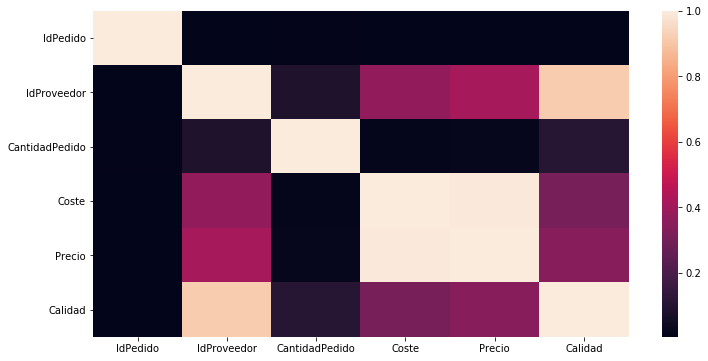

In [706]:
import seaborn as sns
sns.heatmap(pedidoProducto[['IdPedido','Tienda', 'Descripcion', 'TipoUnidad', 'Subfamilia', 'Marca', 'IdProveedor'
                    ,'Pais', 'CantidadPedido','Coste', 'Precio','Calidad']].corr().abs())

In [707]:
from sklearn.model_selection import train_test_split

#### NOTA: Elimino aquellas columnas que directamente me generen la condición de Calidad

In [708]:
x = pedidoProducto[['IdPedido','Tienda', 'Descripcion', 'TipoUnidad', 'Subfamilia', 'Marca', 'IdProveedor'
                    ,'Pais', 'CantidadPedido','Coste', 'Precio'
                    # Si retiro las variables de FechaPedido la predicción ya no es exactamente igual al valor
                    # de la columna Calidad en test
                    #, 'MesPedido', 'SemanaPedido', 'DiaSemanaPedido'
                    
              ## Las fechas de Entrega no las incluyo porque no tiene sentido de cara a una predicción que
              ## recogiera de un formulario la solicitud del pedido 
                    
                    #, 'MesEntrega', 'SemanaEntrega', 'DiaSemanaEntrega'
                   ]]
                    

In [709]:
y = pedidoProducto['Calidad']

In [710]:
#pedidoProducto.dtypes

#### Normalizo las variables

In [711]:
x['CantidadPedido'] = x['CantidadPedido'] - x['CantidadPedido'].mean() / x['CantidadPedido'].std()
x['Coste'] = x['Coste'] - x['Coste'].mean() / x['Coste'].std()
x['Precio'] = x['Precio'] - x['Precio'].mean() / x['Precio'].std()

C:\Users\aalonsom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aalonsom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aalonsom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [712]:
# x['MesPedido'] = x['MesPedido'] - x['MesPedido'].mean() / x['MesPedido'].std()
# x['SemanaPedido'] = x['SemanaPedido'] - x['SemanaPedido'].mean() / x['SemanaPedido'].std()
# x['DiaSemanaPedido'] = x['DiaSemanaPedido'] - x['DiaSemanaPedido'].mean() / x['DiaSemanaPedido'].std()

In [713]:
# x['MesEntrega'] = x['MesEntrega'] - x['MesEntrega'].mean() / x['MesEntrega'].std()
# x['SemanaEntrega'] = x['SemanaEntrega'] - x['SemanaEntrega'].mean() / x['SemanaEntrega'].std()
# x['DiaSemanaEntrega'] = x['DiaSemanaEntrega'] - x['DiaSemanaEntrega'].mean() / x['DiaSemanaEntrega'].std()

In [714]:
#Convierto las columnas categóricas en "columnas dummies"
x = pd.get_dummies(x)

In [715]:
x.head(5)

,IdPedido,IdProveedor,CantidadPedido,Coste,Precio,Tienda_Barcelona,Tienda_Florencia,Tienda_Fort Lauderdale,Tienda_Liverpool,Tienda_Londres I,...,Pais_Dinamarca,Pais_España,Pais_Estados Unidos,Pais_Francia,Pais_Holanda,Pais_Irlanda,Pais_Italia,Pais_Reino Unido,Pais_Suecia,Pais_Suiza
0,82207,301,11.549251,15.257939,25.026461,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,15736,301,11.549251,15.257939,25.026461,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,71217,301,11.549251,15.257939,25.026461,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,92184,301,11.549251,15.257939,25.026461,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,29400,301,11.549251,15.257939,25.026461,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [716]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

**NOTA:**  
Reviso el posible balanceo de la Calidad en las muestras de Train y Test

In [717]:
y_train.value_counts()

0    3464
1    2753
Name: Calidad, dtype: int64

In [718]:
y_test.value_counts()

0    1451
1    1214
Name: Calidad, dtype: int64

**NOTA:**  
No existe diferencia notable entre ambas muestras con respecto a **Calidad 0 | 1**

In [719]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import tree

In [720]:
#Creamos el modelo (sin poda)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 5. Evaluación del Modelo

## 5.1. Modelo de Clasificación

In [721]:
print("precisión del modelo: {0: .2f}".format((y_train == clf.predict(X_train)).mean()))

precisión del modelo:  1.00


In [722]:
preds = clf.predict(X_test)

In [723]:
solution = pd.DataFrame({"IdPedido":X_test.IdPedido, "Calidad": preds.astype('int8')})
solution.shape
solution.head()

,Calidad,IdPedido
4333,1,94605
624,0,96973
3473,1,64156
2517,0,26421
3210,0,73184


In [724]:
pedidoProducto[pedidoProducto['IdPedido'] == 94605]

,IdPedido,Tienda,IdProducto,PrecioCompra,CantidadPedido,FechaPedido,CantidadEntrega,FechaEntrega,ImportePedido,ImporteEntrega,...,Subfamilia,Marca,IdProveedor,MesPedido,SemanaPedido,DiaSemanaPedido,MesEntrega,SemanaEntrega,DiaSemanaEntrega,Calidad
4333,94605,Milán,061PR,3.79,10,2000-10-01,10,2000-10-15,37.9,37.9,...,Oveja Curado,Rocottino,106,10,39,6,10,41,6,1


In [725]:
pedidoCalidad  = pedidoProducto[['IdPedido','Calidad']]
resultado =  pd.merge(solution, pedidoCalidad, on=['IdPedido', 'IdPedido'])

In [726]:
resultado['Resumen'] = resultado['Calidad_x'] - resultado['Calidad_y']

In [727]:
resultado[resultado['Resumen'] > 0].head(5)

,Calidad_x,IdPedido,Calidad_y,Resumen
37,1,19865,0,1
411,1,79303,0,1
460,1,64738,0,1
603,1,77295,0,1
605,1,9373,0,1


In [728]:
resultado[resultado['Resumen'] == 0].head(5)

,Calidad_x,IdPedido,Calidad_y,Resumen
0,1,94605,1,0
1,0,96973,0,0
2,1,64156,1,0
3,0,26421,0,0
4,0,73184,0,0


In [729]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
# Se genera una salida en fichero .pdf
graph.render("algoritmo_clasificacion")

'algoritmo_clasificacion.pdf'

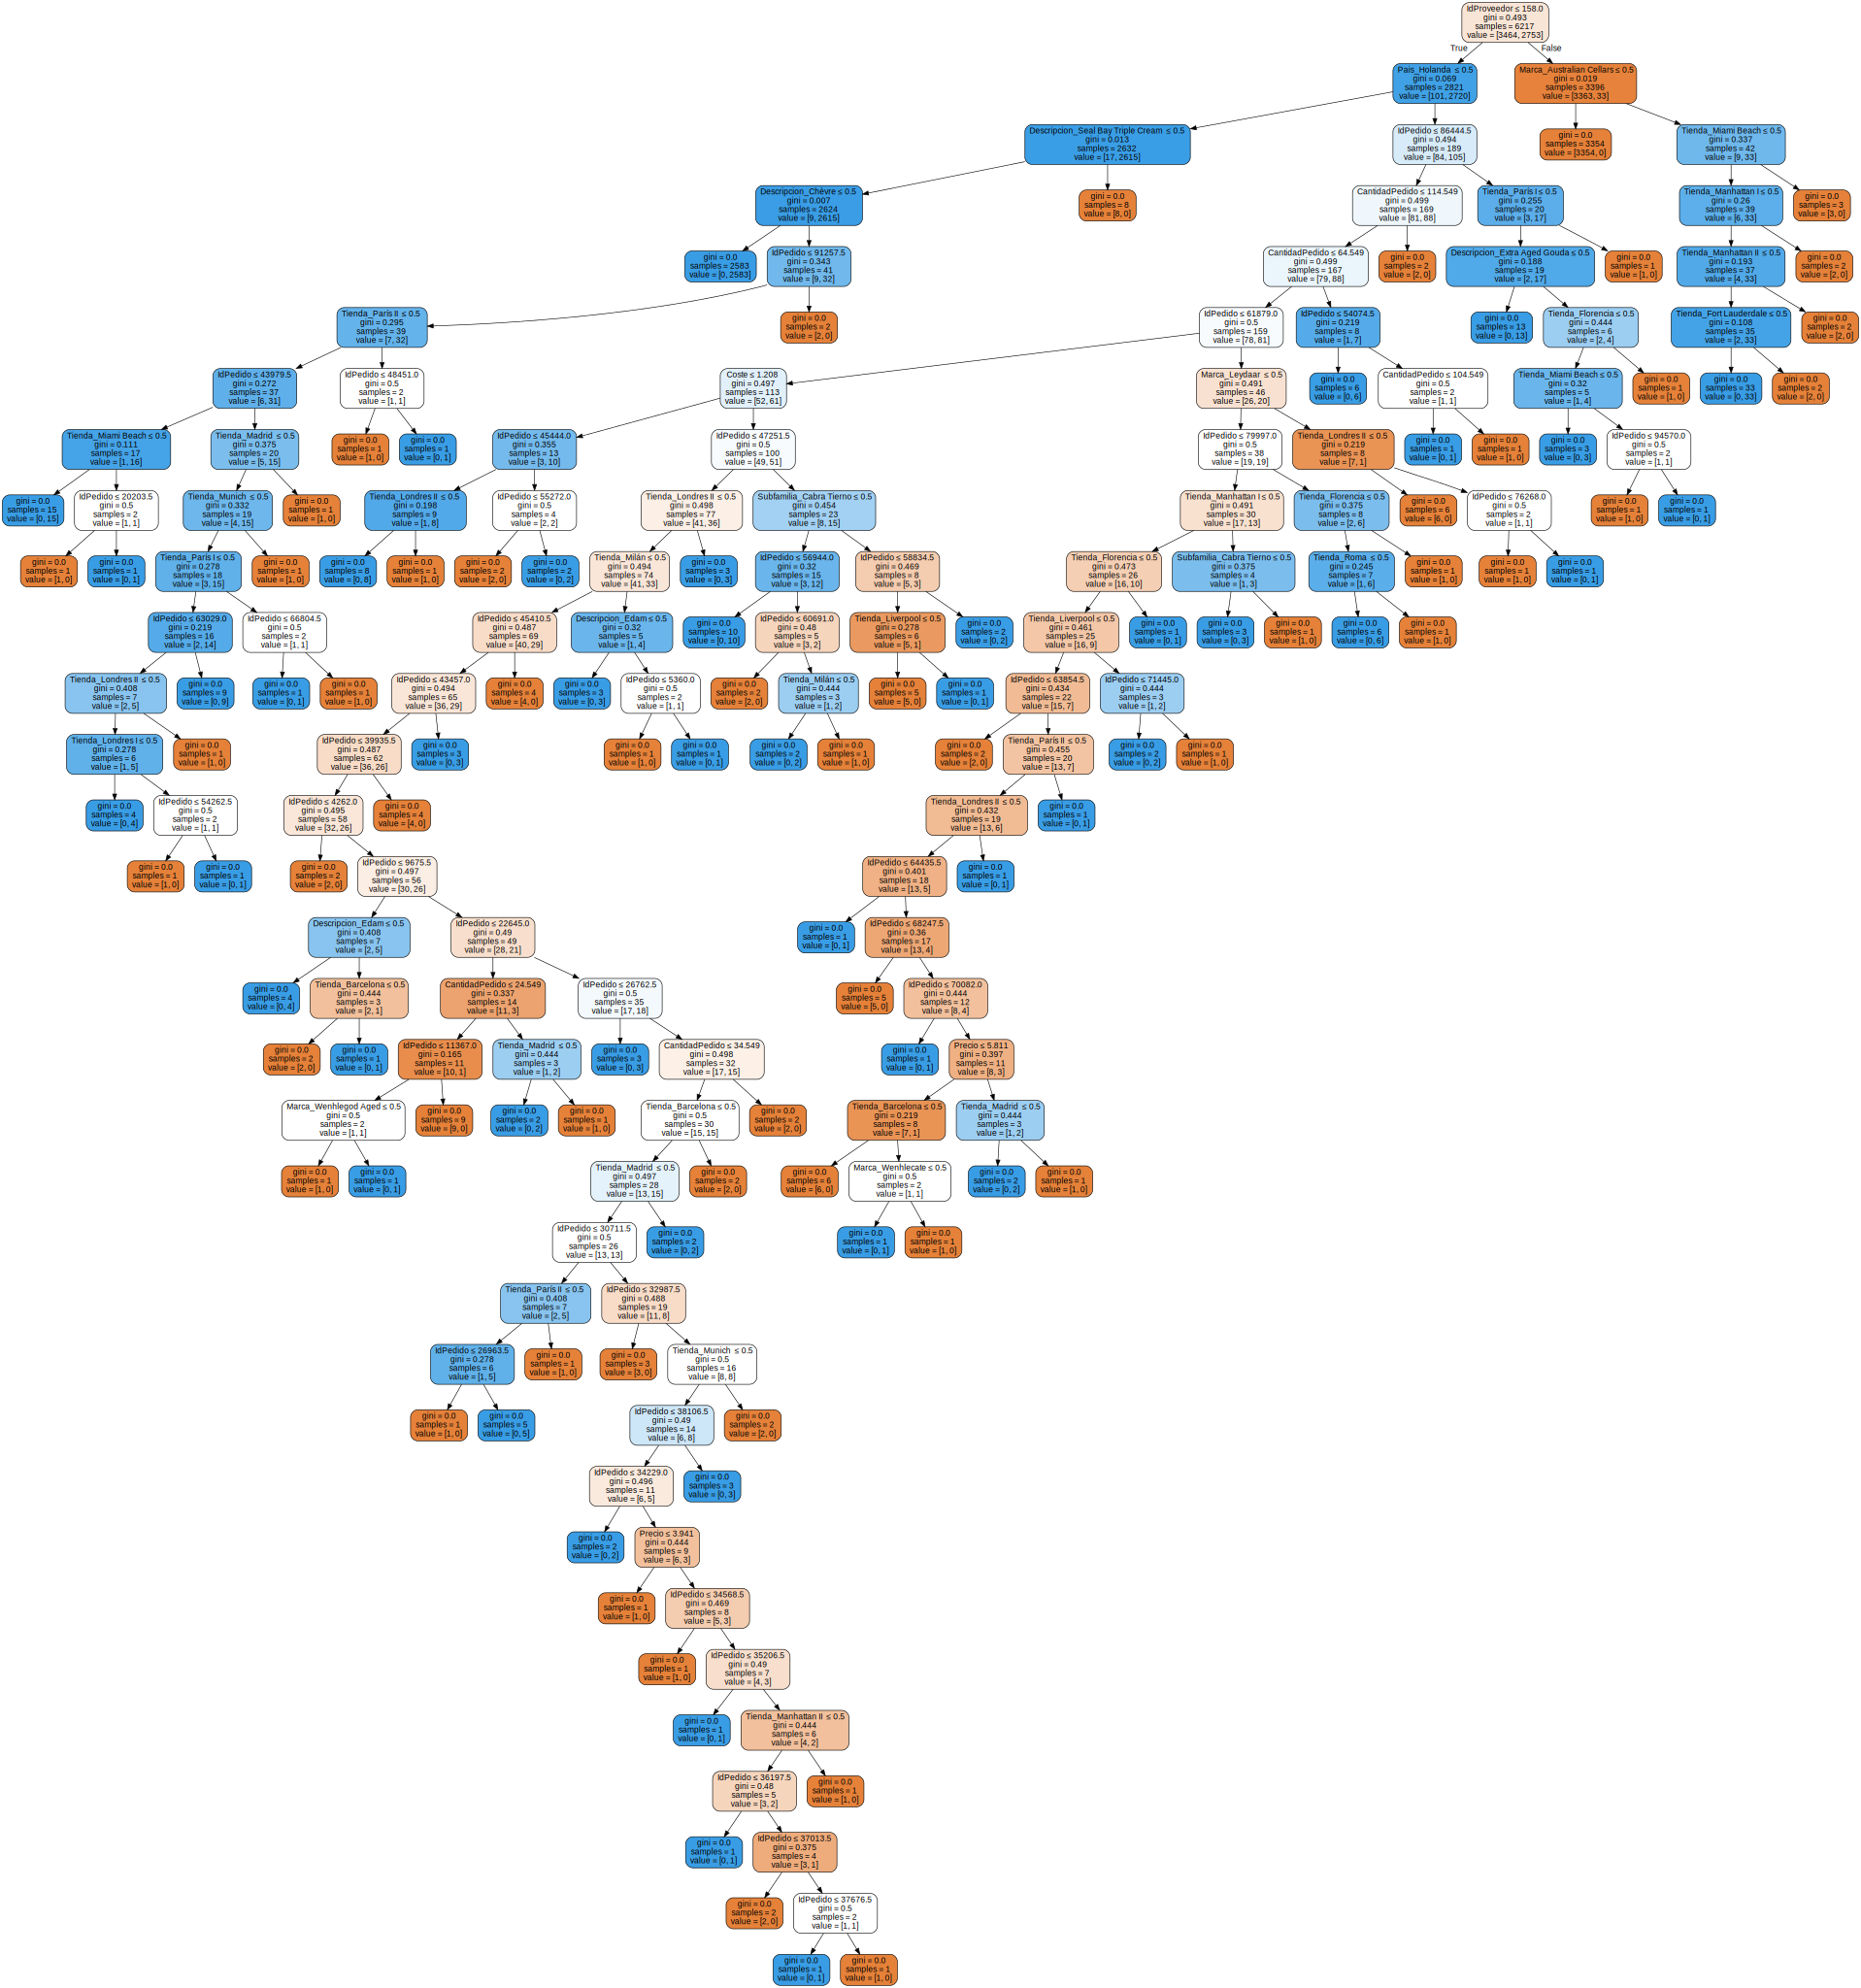

In [730]:
dot_data = tree.export_graphviz(clf,
                         out_file=None, feature_names = X_train.columns , 
                        filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

## 4.2. Modelo Predictivo basado en algoritmo de Reglas de Asociación

En este caso, se va a trabajar sobre el conjunto de datos de **lineas de ticket**. La idea es generar reglas de asociación que permita al cliente **mejorar en el sistema de recomendación**, para generar venta cruzada, o incluso para modificar la ubicación de ciertos productos en las estantería de las tiendas físicas. De este modo, el servicio al cliente será de **mayor calidad**, que enlaza con el giro incluido con el anterior desarrollo. Incrementar la calidad de nuestro servicio y atención al cliente, siendo éste el centro de la **nueva visión estratégica**.

### 4.2.1. Paso primero  
En este primera aproximación, lo que se hace es crear un nuevo dataset mediante la **unión** de los datasets **lineasticket** y **producto** para poder realizar un análisis global de los **"gustos" de los consumidores**. 

In [731]:
lineasticket.dtypes

CodLinea        int64
CodVenta       object
Tienda         object
IdProducto     object
Cantidad        int64
Precio        float64
Promocion      object
IdCabecera      int64
dtype: object

In [732]:
pedido.dtypes

IdPedido             int64
Tienda              object
IdProducto          object
PrecioCompra       float64
CantidadPedido       int64
FechaPedido          int64
CantidadEntrega      int64
FechaEntrega         int64
ImportePedido      float64
ImporteEntrega     float64
NoServido            int64
TiempoEntrega        int64
dtype: object

In [733]:
lineasticket.describe(include="all")

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera
count,174671.000000,174671,174671,174671,174671.000000,174671.000000,1749,174671.000000
unique,NaN,74327,15,338,NaN,NaN,5,NaN
top,NaN,M15505039,Londres I,022CA,NaN,NaN,Merlot Introduction,NaN
freq,NaN,15,29803,6409,NaN,NaN,876,NaN
mean,2.135208,NaN,NaN,NaN,1.328681,14.454361,NaN,50679.358938
std,1.412435,NaN,NaN,NaN,0.711723,17.112251,NaN,21398.903140
min,1.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,13527.000000
25%,1.000000,NaN,NaN,NaN,1.000000,5.725000,NaN,32332.000000
50%,2.000000,NaN,NaN,NaN,1.000000,9.587500,NaN,50578.000000
75%,3.000000,NaN,NaN,NaN,1.000000,19.380000,NaN,69085.000000


In [734]:
# Observo que existen varios tickets con productos con valor igual a cero, y eso no debería ser posible
# Salvo que sea un producto que tenga un coste reducido y por tanto se "regale" como detalle en compras elevadas
lineasticketX = lineasticket[lineasticket['Precio']==0]

In [735]:
lineasticketX['IdProducto'].unique()

array(['123CB ', '077MA ', '108CA '], dtype=object)

In [736]:
A = producto[producto['IdProducto'] == '123CB']
B = producto[producto['IdProducto'] == '077MA']
C= producto[producto['IdProducto'] == '108CA']
print("El primer producto es: " + A['Descripcion'])
print(" El segundo es: " + B['Descripcion'])
print(" El tercero es: " + C['Descripcion'])

122    El primer producto es: Chocolate Bars
Name: Descripcion, dtype: object
76     El segundo es: Mahón 
Name: Descripcion, dtype: object
107     El tercero es: Carquiñolis 
Name: Descripcion, dtype: object


Efectivamente se trata de **productos de bajo coste** (menor de 4 euros) y que son usados como **atención al cliente**.  
Procedemos a realizar la obtención del modelo de reglas de asociación, **retirando estos artículos** con precio de venta 0  
#### Estoy teniendo problemas con el join entre producto y lineas de ticket, con lo que voy a usar MS SQL Server 2017 para ejecutar la join entre ambos datasets

![Texto alternativo](GourmetDB/SQL.PNG "Título alternativo")

In [737]:
productos = pd.read_csv("GourmetDB\\productos.csv", delimiter = ';', encoding = "ISO-8859-1", engine='python')

**NOTA:**  
El precio en esta caso, es **erróneo!**. Pero como ya he filtrado por los que tenian **precio <> 0** y los quiero para hacer recomendación de compra mediante asociación dentro del ticket de compra, el **importe cobrado no me aporta valor**.

In [738]:
productos.head(5)

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera,IdProducto.1,Descripcion,Pais,Coste,Precio.1,TipoUnidad,Subfamilia,Marca,IdProveedor
0,1,RO0196609,Roma,267BP,1,88000,NaN,13642,267BP,Bourgogne Pinot Noir 97,Francia,495,880,Botella,D.O. Bourgogne-Tinto,Château des Duc,314
1,2,RO0065539,Roma,079MA,1,49750,NaN,13638,079MA,Manchego,España,351,498,Porción (250 g),Oveja Semicurado,La Meseta Semi,108
2,3,RO0065539,Roma,158TR,2,114500,NaN,13638,158TR,Tinto Reserva 95,España,667,1145,Botella,D.O. Rioja-Tinto,Señorío de San Gervasio,306
3,4,RO0065539,Roma,283BC,2,299500,NaN,13638,283BC,Brut Chardonnay Blanc de Blancs,Francia,1571,2995,Botella,D.O. Champagne-Brut,Château d'Or,313
4,1,RO0131072,Roma,208ME,1,262000,NaN,13639,208ME,Merlot 97,Estados Unidos,1630,2620,Botella,D.O. Napa-Tinto,West Vineyards,321


In [739]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [740]:
productos.describe(include='all')

,CodLinea,CodVenta,Tienda,IdProducto,Cantidad,Precio,Promocion,IdCabecera,IdProducto.1,Descripcion,Pais,Coste,Precio.1,TipoUnidad,Subfamilia,Marca,IdProveedor
count,174516.000000,174516,174516,174516,174516.000000,1.745160e+05,1749,174516.000000,174516,174516,174516,174516.000000,174516.000000,174516,174516,174516,174516.000000
unique,NaN,74308,15,337,NaN,NaN,5,NaN,337,247,15,NaN,NaN,5,74,183,NaN
top,NaN,M15505039,Londres I,022CA,NaN,NaN,Merlot Introduction,NaN,022CA,Tinto Reserva 95,España,NaN,NaN,Botella,D.O. Rioja-Tinto,Factory Chocolate,NaN
freq,NaN,15,29782,6409,NaN,NaN,876,NaN,6409,7278,45479,NaN,NaN,93394,18981,9986,NaN
mean,2.135208,NaN,NaN,NaN,1.328595,1.446304e+05,NaN,50679.599945,NaN,NaN,NaN,840.218496,1446.955620,NaN,NaN,NaN,231.440934
std,1.412526,NaN,NaN,NaN,0.711583,1.711737e+05,NaN,21398.940203,NaN,NaN,NaN,992.503856,1711.288669,NaN,NaN,NaN,93.774458
min,1.000000,NaN,NaN,NaN,1.000000,0.000000e+00,NaN,13527.000000,NaN,NaN,NaN,140.000000,200.000000,NaN,NaN,NaN,101.000000
25%,1.000000,NaN,NaN,NaN,1.000000,5.725000e+04,NaN,32332.000000,NaN,NaN,NaN,390.000000,573.000000,NaN,NaN,NaN,108.000000
50%,2.000000,NaN,NaN,NaN,1.000000,9.587500e+04,NaN,50577.500000,NaN,NaN,NaN,584.000000,959.000000,NaN,NaN,NaN,302.000000
75%,3.000000,NaN,NaN,NaN,1.000000,1.938000e+05,NaN,69086.000000,NaN,NaN,NaN,1104.000000,1938.000000,NaN,NaN,NaN,314.250000


In [741]:
# Las tiendas que más ventas realizan son:
# Londres I
# Manhattan I
# Londres II
productos['Tienda'].value_counts()

Londres I           29782
Manhattan I         23622
Londres II          15355
Milán               14607
Munich              13197
París I             12790
Roma                11236
Miami Beach         10536
Barcelona           10114
Madrid               8825
Liverpool            8114
París II             6043
Manhattan II         3854
Florencia            3676
Fort Lauderdale      2765
Name: Tienda, dtype: int64

#### NOTA:  
Eso es verdad en cuanto a líneas de tickets, pero si se mira el **número total de tickets**, la clasificación es distinta, siendo la primera: 

**1. Manhattan I**  
**2. Londres I**  
**3. Miami Beach**  
    

In [742]:
productos['CodLinea'].count()


174516

In [743]:
cestaCompra = (productos.groupby(['CodVenta','Descripcion'])['Cantidad']
        .sum().unstack().reset_index().fillna(0)
         .set_index('CodVenta')
        )

In [744]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >=1:
        return 1

In [745]:
cesta = cestaCompra.applymap(encode_units)

In [746]:
productos_frecuentes = apriori(cesta, min_support = 0.001, use_colnames = True)

In [747]:
rules = association_rules(productos_frecuentes, metric = 'lift', min_threshold=1)

In [748]:
rules.head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cabernet Sauvignon Gran Reserva Esp. 79 ),(Bordeaux 97 ),0.019325,0.065632,0.001373,0.071031,1.082252,0.000104,1.005811
1,(Bordeaux 97 ),(Cabernet Sauvignon Gran Reserva Esp. 79 ),0.065632,0.019325,0.001373,0.020914,1.082252,0.000104,1.001623
2,(Bordeaux 97 ),(Cru Beaujolais 98 ),0.065632,0.022366,0.001763,0.026861,1.200945,0.000295,1.004618
3,(Cru Beaujolais 98 ),(Bordeaux 97 ),0.022366,0.065632,0.001763,0.078821,1.200945,0.000295,1.014317
4,(Golden Semillon 97),(Bordeaux 97 ),0.019352,0.065632,0.001440,0.074409,1.133725,0.000170,1.009482


# 5. Evaluación del Modelo

## 5.2. Evaluación del Modelo de Reglas de Asociación

In [749]:
rules[(rules['confidence']>=0.1) & (rules['support'] >=0.005)].head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,(Chocolate Truffle ),(Tinto Reserva 95),0.069387,0.093462,0.007038,0.101435,1.085306,0.000553,1.008873
184,(Tiramisú),(Chocolate Truffle ),0.061568,0.069387,0.017656,0.286776,4.133000,0.013384,1.304798
185,(Chocolate Truffle ),(Tiramisú),0.069387,0.061568,0.017656,0.254461,4.133000,0.013384,1.258729
186,(Chocolate Truffle ),(Zinfandel 97),0.069387,0.031598,0.013202,0.190264,6.021346,0.011009,1.195947
187,(Zinfandel 97),(Chocolate Truffle ),0.031598,0.069387,0.013202,0.417802,6.021346,0.011009,1.598449


El **Tinto Reserva 95** está presenta en **casi 7.000 compras** de ellas, casi todas de una **única unidad de compra**. Sólo aparece en compras con más de una línea en poco más de 300 ocasiones, por lo que **no es buen desencadenador de una sugerencia de compra basado en este modelo**.  
El **Chocolate Truffle** está incluido en más de **5.000 compras**  
El **Tiramisú** en más de **4.000 compras**  
El **Zinfandel 97** en más de **2.400 compras**  

### Extra:  

Como el resultado es muy genérico y aporta información, pero con bajos valores de soporte y confianza, he pensado en **"repetirlo"** tomando el campo de **subfamilia** que es **menos granular**. Vamos a ver que resultados aporta:

In [750]:
cestaCompraSub = (productos.groupby(['CodVenta','Subfamilia'])['Cantidad']
        .sum().unstack().reset_index().fillna(0)
         .set_index('CodVenta')
        )

In [751]:
cestaSub = cestaCompraSub.applymap(encode_units)

In [752]:
Sub_frecuentes = apriori(cestaSub, min_support = 0.01, use_colnames = True)

In [753]:
rulesSub= association_rules(Sub_frecuentes, metric = 'lift', min_threshold=1)

In [754]:
rulesSub.head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(D.O. Champagne-Brut ),(Galletas de chocolate ),0.114200,0.117767,0.015449,0.135282,1.148727,0.002000,1.020255
1,(Galletas de chocolate ),(D.O. Champagne-Brut ),0.117767,0.114200,0.015449,0.131185,1.148727,0.002000,1.019549
2,(D.O. Napa-Blanco),(Galletas de chocolate ),0.124401,0.117767,0.015705,0.126244,1.071985,0.001055,1.009702
3,(Galletas de chocolate ),(D.O. Napa-Blanco),0.117767,0.124401,0.015705,0.133356,1.071985,0.001055,1.010333
4,(D.O. Napa-Rosado),(Galletas de chocolate ),0.028167,0.117767,0.013767,0.488772,4.150346,0.010450,1.725715


In [755]:
rulesSub[(rulesSub['confidence']>=0.15) & (rulesSub['support'] >=0.01)].head(5)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(D.O. Napa-Rosado),(Galletas de chocolate ),0.028167,0.117767,0.013767,0.488772,4.150346,0.010450,1.725715
6,(Tartas),(Galletas de chocolate ),0.071056,0.117767,0.020832,0.293182,2.489516,0.012464,1.248176
7,(Galletas de chocolate ),(Tartas),0.117767,0.071056,0.020832,0.176894,2.489516,0.012464,1.128584


## 4.3. Modelo Predictivo basado en Agregación mediante algoritmo de K-Means

Para la creación de este modelo predictivo, he tomado como base el fichero de cabecera de tickets y he realizado una serie de transformaciones a los campos de las columnas Sexo e Hjos, ya que existían 805 registros que estaban vacíos y justo correspondían a "Empresas".  
Una vez completada la actualización de dichos registros (mediante SQL Server 2017) he creado un procedimiento almacenado que realizara una análisis de los gustos de los clientes como:  

![Texto alternativo](GourmetDB/SuperPlus.PNG "Título alternativo")


1. Hora habitual de compra
2. Tienda habitual de compra
3. Forma de pago habitual que usa el cliente
4. Número de unidades que más se repite en sus compras
5. Importe máximo alcanzado en una compra
6. Importe medio de las compras relizadas por el cliente  

Todo eso unido al fichero de cliente nos provee de un conjunto más enriquecido y que usaremos para trabajar nuestro modelo de agregación

In [756]:
ClienteResumen = pd.read_excel("GourmetDB\\ClienteResumen_Plus.xlsx")

![Texto alternativo](GourmetDB/ClienteCompras.PNG "Título alternativo")

In [757]:
ClienteResumen.head(5)

,IdCliente,NombreCliente,Sexo,FechaNacimiento,EstadoCivil,Direccion,Profesion,Hijos,Region,Nacionalidad,...,IdProfesion,IdTienda,IdFormaPago,IdCliente.1,HoraH,TiendaH,FormaPagoH,UnidadesH,ImporteMax,ImporteAvg
0,0065536F,Fuentes Mohedano Rosa,Mujer,19420108,Casado/a,C/ Niza 73 08032 Barcelona,Ingenieros & Especialistas,1,Sur Europa,España,...,5,1,4,0065536F,20,Barcelona,Tarjeta de Crédito,2,5.5625,41.200313
1,0065537P,Prat Salom Pedro,Hombre,19400315,Casado/a,"corso Vittorio Emanuele, 102 Roma",Doctores & Profesionales de la Salud,2,Sur Europa,España,...,10,15,4,0065537P,10,Roma,Tarjeta de Crédito,2,6.2250,42.024464
2,0000002J,Jones Nicholas,Hombre,19110808,Soltero/a,"1 Place de la Sorbonne , 75003 Paris",Ingenieros & Especialistas,0,Norte Europa,Reino Unido,...,5,14,3,0000002J,20,París II,Efectivo,11,208.7450,109.022500
3,0000003B,Burton Alexander,Hombre,19420417,Casado/a,"46 Stockwell Place ,Liverpool L69 2DH",Doctores & Profesionales de la Salud,2,Norte Europa,Reino Unido,...,10,4,4,0000003B,20,Liverpool,Tarjeta de Crédito,2,7.4500,18.640000
4,0065538S,Sales Deborah,Mujer,19410526,Casado/a,"Leopoldstraße 44, München","Economistas,Abogados & Admin.Empresas",1,Norte Europa,Reino Unido,...,9,12,1,0065538S,18,Munich,Cheque,6,35.4500,54.169643


In [758]:
ClienteResumen['date'] = pd.to_datetime(ClienteResumen['FechaNacimiento'], format='%Y%m%d', errors='ignore')

In [759]:
ClienteResumen['Edad']= (pd.to_datetime(ClienteResumen['date']) - pd.to_datetime('today'))

In [760]:
from sklearn.cluster import KMeans

In [761]:
ClienteResumen['Edad'] = ClienteResumen['Edad'].dt.days

In [762]:
ClienteResumen['Edad'] = ClienteResumen['Edad'] - ClienteResumen['Edad'].mean() / ClienteResumen['Edad'].std()

In [763]:
ClienteResumen.drop("date", axis=1, inplace=True)

In [764]:
ClienteResumen.drop("Direccion", axis=1, inplace=True)

In [765]:
ClienteResumen.drop("IdCliente", axis=1, inplace=True)

In [766]:
ClienteResumen.drop("NombreCliente", axis=1, inplace=True)

In [767]:
ClienteResumen.drop("FechaNacimiento", axis=1, inplace=True)

In [768]:
ClienteResumen.drop("Sexo", axis=1, inplace=True)

In [769]:
ClienteResumen.drop("EstadoCivil", axis=1, inplace=True)

In [770]:
ClienteResumen.drop("Profesion", axis=1, inplace=True)

In [771]:
ClienteResumen.drop("Region", axis=1, inplace=True)

In [772]:
ClienteResumen.drop("Nacionalidad", axis=1, inplace=True)

In [773]:
ClienteResumen.drop("IdCliente.1", axis=1, inplace=True)

In [774]:
ClienteResumen.drop("FormaPagoH", axis=1, inplace=True)

In [775]:
ClienteResumen.drop("TiendaH", axis=1, inplace=True)

In [776]:
ClienteResumen.dtypes

Hijos               int64
TotalCompras        int64
TotalPuntos         int64
IdSexo              int64
IdEstadoCivil       int64
IdNacionalidad      int64
IdProfesion         int64
IdTienda            int64
IdFormaPago         int64
HoraH               int64
UnidadesH           int64
ImporteMax        float64
ImporteAvg        float64
Edad              float64
dtype: object

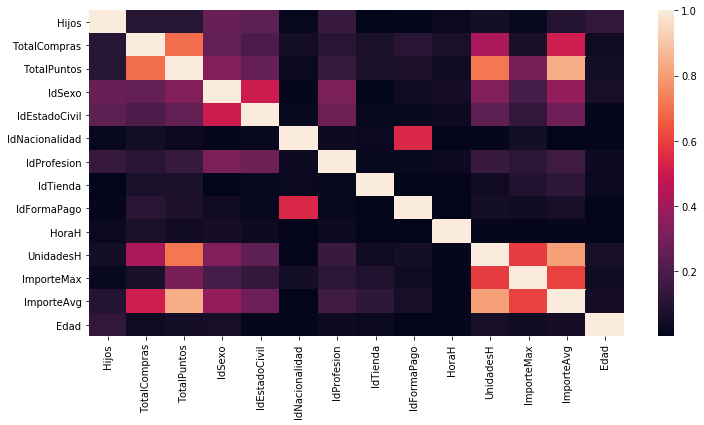

In [777]:
import seaborn as sns
sns.heatmap(ClienteResumen[['Hijos', 'TotalCompras', 'TotalPuntos'
                           , 'IdSexo', 'IdEstadoCivil', 'IdNacionalidad', 'IdProfesion'
                            , 'IdTienda', 'IdFormaPago', 'HoraH', 'UnidadesH'
                           , 'ImporteMax', 'ImporteAvg','Edad']].corr().abs())

#### 3.2. Normalizamos las variables numéricas

In [778]:
ClienteResumen['Hijos'] = (ClienteResumen['Hijos'] - ClienteResumen['Hijos'].mean()) / ClienteResumen['Hijos'].std()

In [779]:
ClienteResumen['TotalCompras'] = (ClienteResumen['TotalCompras'] - ClienteResumen['TotalCompras'].mean()) / ClienteResumen['TotalCompras'].std()

In [780]:
ClienteResumen['TotalPuntos'] = (ClienteResumen['TotalPuntos'] - ClienteResumen['TotalPuntos'].mean()) / ClienteResumen['TotalPuntos'].std()

In [781]:
ClienteResumen['HoraH'] = (ClienteResumen['HoraH'] - ClienteResumen['HoraH'].mean()) / ClienteResumen['HoraH'].std()

In [782]:
ClienteResumen['UnidadesH'] = (ClienteResumen['UnidadesH'] - ClienteResumen['UnidadesH'].mean()) / ClienteResumen['UnidadesH'].std()

In [783]:
ClienteResumen['ImporteMax'] = (ClienteResumen['ImporteMax'] - ClienteResumen['ImporteMax'].mean()) / ClienteResumen['ImporteMax'].std()

In [784]:
ClienteResumen['ImporteAvg'] = (ClienteResumen['ImporteAvg'] - ClienteResumen['ImporteAvg'].mean()) / ClienteResumen['ImporteAvg'].std()

In [785]:
ClienteResumen.dtypes

Hijos             float64
TotalCompras      float64
TotalPuntos       float64
IdSexo              int64
IdEstadoCivil       int64
IdNacionalidad      int64
IdProfesion         int64
IdTienda            int64
IdFormaPago         int64
HoraH             float64
UnidadesH         float64
ImporteMax        float64
ImporteAvg        float64
Edad              float64
dtype: object

In [786]:
#df = pd.get_dummies(ClienteResumen)

In [787]:
df = ClienteResumen

In [788]:
df.head(3)

,Hijos,TotalCompras,TotalPuntos,IdSexo,IdEstadoCivil,IdNacionalidad,IdProfesion,IdTienda,IdFormaPago,HoraH,UnidadesH,ImporteMax,ImporteAvg,Edad
0,0.192981,1.178899,0.136621,2,1,1,5,1,4,0.567290,-0.24564,-0.712549,-0.042156,-27908.282436
1,1.038647,0.839412,-0.175451,1,1,1,10,15,4,-1.914208,-0.24564,-0.677278,-0.021201,-28572.282436
2,-0.652685,-1.197509,-0.279476,1,2,2,5,14,3,0.567290,3.72078,10.104777,1.682275,-39019.282436


In [789]:
X = np.array(df)

X.shape

(3922, 14)

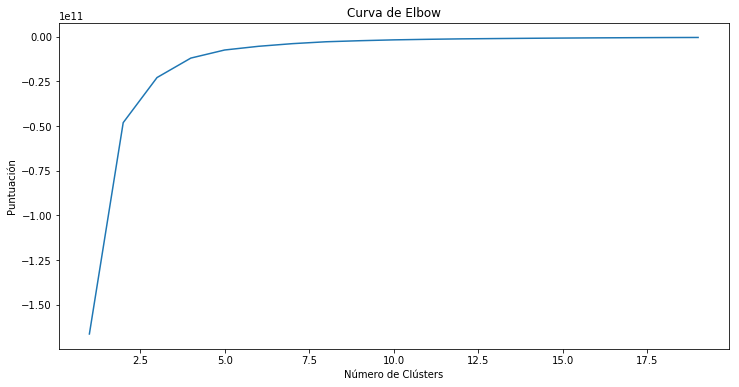

In [790]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clústers')
plt.ylabel('Puntuación')
plt.title('Curva de Elbow')
plt.show()

**IMPORTANTE:** en función de la gráfica se decide que el número de **clusters sea 5**.

In [791]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  4.85217234e-03   2.22238561e-02   8.58448823e-02   9.52483801e-01
    1.49028078e+00   1.23974082e+00   6.17278618e+00   7.96760259e+00
    2.53131749e+00   2.16819441e-02   1.20828070e-01   1.52399118e-01
    1.39296685e-01  -3.54959736e+04]
 [  1.66199713e-01   3.80410566e-02   6.67604143e-04   1.11814860e+00
    1.66017052e+00   1.25091352e+00   6.62850183e+00   7.66626066e+00
    2.48599269e+00   2.47456021e-02  -5.15312165e-03  -2.67408555e-02
    2.26212333e-02  -2.03563519e+04]
 [  1.01848844e-01   4.57680246e-02   3.42846070e-02   1.06720742e+00
    1.62224797e+00   1.25840093e+00   6.42757822e+00   7.94322132e+00
    2.51216686e+00  -2.84996208e-02   1.48049137e-02  -2.15560925e-02
    8.95808172e-03  -2.94449568e+04]
 [ -3.75939124e-01  -1.11112502e-01  -9.66918306e-02   1.12884835e+00
    1.62713797e+00   1.21094641e+00   6.50969213e+00   7.71493729e+00
    2.58266819e+00   1.63803952e-02  -1.15486153e-01  -6.20313098e-02
   -1.22815237e-01  -1.57238571e+04]
 [  1.148179

In [792]:
%matplotlib inline
import matplotlib 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 5. Evaluación del Modelo

## 5.3. Evaluación del Modelo de Agregación

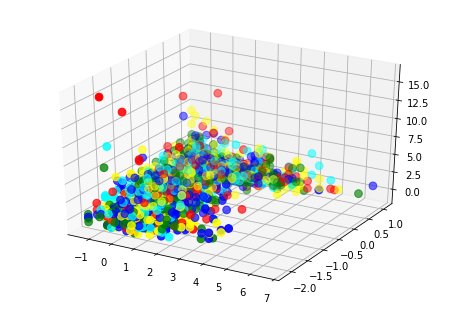

In [793]:
#Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 1], X[:, 9], X[:, 11], c=asignar,s=60)
ax.scatter(C[:, 1], C[:, 9], C[:,11], marker='*', c=colores, s=1000)

In [794]:
df.dtypes

Hijos             float64
TotalCompras      float64
TotalPuntos       float64
IdSexo              int64
IdEstadoCivil       int64
IdNacionalidad      int64
IdProfesion         int64
IdTienda            int64
IdFormaPago         int64
HoraH             float64
UnidadesH         float64
ImporteMax        float64
ImporteAvg        float64
Edad              float64
dtype: object

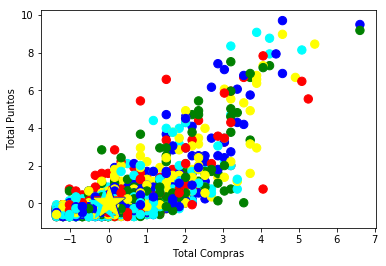

In [795]:
# Graficando las variables Total Compras vs Total Puntos
f1 = df.iloc[:,1:2].values
f2 = df.iloc[:,2:3].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.xlabel("Total Compras")
plt.ylabel("Total Puntos")
plt.show()

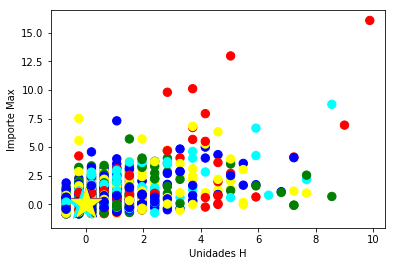

In [796]:
# Graficando las variables Unidades Habituales vs Importe máximo
f1 = df.iloc[:,10:11].values
f2 = df.iloc[:,11:12].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.xlabel("Unidades H")
plt.ylabel("Importe Max")
plt.show()

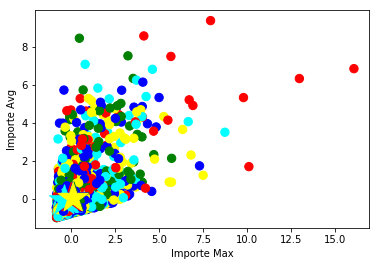

In [797]:
# Graficando las variables Importe máximo vs Importe medio
f1 = df.iloc[:,11:12].values
f2 = df.iloc[:,12:13].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Importe Max")
plt.ylabel("Importe Avg")
plt.show()

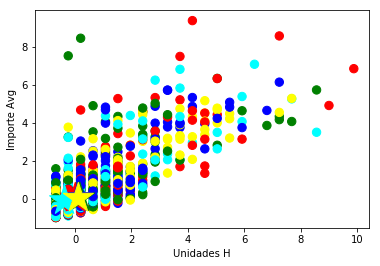

In [798]:
# Graficando las variables Unidades Habitual vs Importe medio
f1 = df.iloc[:,10:11].values
f2 = df.iloc[:,12:13].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Unidades H")
plt.ylabel("Importe Avg")
plt.show()

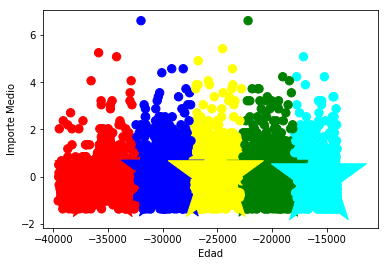

In [799]:
# Graficando las variables Edad vs Importe medio
f1 = df.iloc[:,13:14].values
f2 = df.iloc[:,1:2].values

    
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 13], C[:, 1], marker='*', c=colores, s=10000)
plt.xlabel("Edad")
plt.ylabel("Importe Medio")
plt.show()

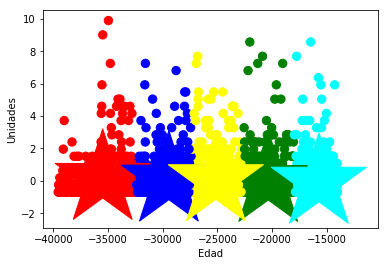

In [800]:
# Graficando las variables Edad vs Unidades Habituales
f1 = df.iloc[:,13:14].values
f2 = df.iloc[:,10:11].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 13], C[:, 10], marker='*', c=colores, s=10000)
plt.xlabel("Edad")
plt.ylabel("Unidades")
plt.show()

**IMPORTANTE:** Esta úlima gráfica es la que muestra mayor nivel de agregación, por lo que se puede comentar que las variables Edad y Unidades son las que mejorar clusterizan a nuestros clientes.

# 6. Implantación de la solución

## 6.1. Conclusiones

### 6.1.1 Origen de Datos  

El **ERP es manifiestamente mejorable**. Hay que realizar una auditoría, así como **formación al personal de tienda** para que conozcan la importancia de la **recogida correcta de los datos**. Ellos son los ladrillos con los que cimentar cualquier proyecto de Minería de Datos.  

El consultor del ERP debe trabajar sobre las **tablas de referencia**, ya que no suelen aportar ningún valor adicional a las 3 - 4 tablas de trabajo habitual. 

Sería buena idea completar el sistema con un **CRM** como nueva fuente de datos del cliente, y control de métricas de trabajo y nuevos KPIs.  

Además de incluir una **App** para mejorar tanto la relacción con el cliente, como para conocer sus gustos, incrementar el perfilado del mismo (móvil, S.O., ubicaciones), etc.

### 6.1.2 Enriquecimiento  

Como ya he comentado anteriormente, los ficheros del ERP son muy pobres y su formato no es el idóneo (sobretodo en fechas). He trabajado con varios ficheros que recogían información de otros, pero se echan en falta el desarrollo de un **datawarehouse** de cara a usar **estadísticas agregadas**, contextualizadas y de **evolución del cliente**. He trabajado con un mínimo procedimiento almacenado de TSQL para analizar aspectos básicos como:

![Texto alternativo](GourmetDB/DWH.PNG "Título alternativo")  

Si es cierto, que aquí debería haber incluido el día de la semana habitual de compra. **Error mío**

### 6.1.3. Modelos Predictivos  

Los modelos incluidos en esta primera entrega del proyecto **responden al propósito pactado** en la primera entrevista. **Incrementar el conocimiento** sobre nuestros clientes, pero sobretodo respecto a nuestro sistema, **para** conseguir **incrementar el beneficio** de la compañía.  

1. Modelo Predictivo basado en algoritmo de **Clasificación**: permite identificar aquellos pedidos que incurrirán en **"No Calidad"**. Permitiendo **anticipar** al cliente una respuesta para evitar **reclamaciones y devoluciones**.  
2. Modelo Predictivo basado en algoritmo de **Reglas de Asociación**: aunque muchos de los tickets no estaban asignados a cliente, ésto no impide que se hayan trabajado los ficheros y se consiguiera extraer conocimiento sobre los **productos** que más habitualmente se encuentran **combinados en la cesta de la compra**. En un segundo paso, como ya he apuntado anteriormente, se podría trabajar segmentando por Tienda o incluso por profesión, estado civil, etc. Recordar que para ello, es **básico recoger correctamente la información en origen**.
3. Modelo Predictivo basado en algoritmo de **Agregación**: el propio algoritmo ha clusterizado a los clientes, siendo la **variable "Edad"** aquella con la que se puede segmentar más apropiadamente a los consumidores.

En una **segunda etapa**, con la implantación de un datawarehouse y la mejora del sistema ERP y la recogida de datos, se podrán **abordar** proyectos de Minería de Datos como **Análisis de Series Temporales** para crear Forecast de Ventas y así, junto con el Modelo Predictivo de Clasificación, mejorar la eficiencia y respuesta a los pedidos de los clientes. Así como continuar mejorando el sistema de recomendación de venta cruzada.

### 6.1.4. Conocmiento Adicional  

A lo largo de la práctica se han identificado algunas de las claves del problema, dichas claves comienzan a aportar información a la organización. Alguna de ellas son:  

1. Se utilizan tres productos como "detalle" hacia los usuarios.
2. Se realizan muy pocas promociones y sólo en tres tiendas.
3. No se recoge correctamente la información en el punto de venta.
4. No es posible que la organización sólo tenga clientes de tres nacionalidades, cuando tiene 15 tiendas en varios paises.
5. El día de mayor venta es el sábado. Seguido del viernes y jueves.
6. Las hora de más venta son por la tarde noche, entre las 20 y las 22.
7. Que se han detectado reglas de asociación interesantes entre Tiramisú y Chocolate Truffle, Tartas y Galletas, D.O. Napa Rosado y Galletas de chocolate, etc.
8. Se puede anticipar la No Calidad en los pedidos.